# Task 2 - Supervised Machine Learning : Simple Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing Data
data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Data Dimensions
data.shape

(25, 2)

In [4]:
#Data Summary
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
#Checking Missing Value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

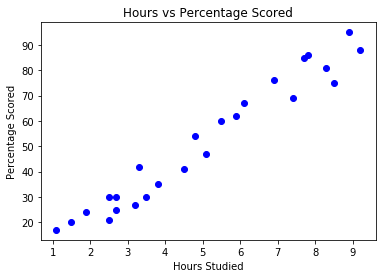

In [7]:
#Plotting the Data
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Percentage Scored')
plt.scatter(data.Hours, data.Scores, color = 'blue', marker = 'o')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

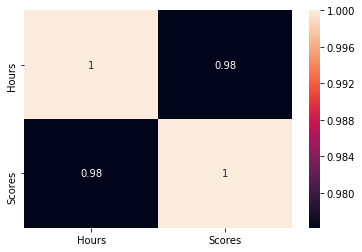

In [8]:
#Building Correlation Matrix
sns.heatmap(data.corr(), annot = True)

**There is strong positive correlation among the two variables.**

### **Training the Data**

In [10]:
#Preparing the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [11]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Here, we split the data - 80% into training set and 20% into testing set.**

### **Model Building**

In [12]:
#Fitting Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### **Testing the Data**

In [16]:
#Predicting the Test Set Result
y_pred = reg.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [17]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Plotting Regression Line**

In [18]:
#Calculating Intercept
reg.intercept_

2.018160041434683

In [19]:
#Calculating Coefficient
reg.coef_

array([9.91065648])

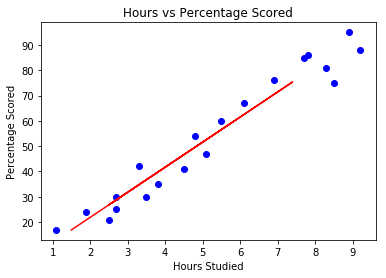

In [20]:
# Plotting the regression line for test data
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs Percentage Scored')
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.show()

### **Predicting for given value i.e. for 9.25**

In [21]:
#Predicting for given value
pred = reg.predict([[9.25]])
pred

array([93.69173249])

**If a student studies for 9.25 hours a day then his/her predicted percentage score will be 93.69%.**

### **Evaluating the Model**

In [22]:
#Calculating the R-Squared value/Accuracy and Mean Absolute Error
from sklearn import metrics
print('R^2 Square:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

R^2 Square: 0.9454906892105356
Mean Absolute Error: 4.183859899002975


**The accuracy of the model is 94.55%.**
**The mean absolute error is 4.18%.**